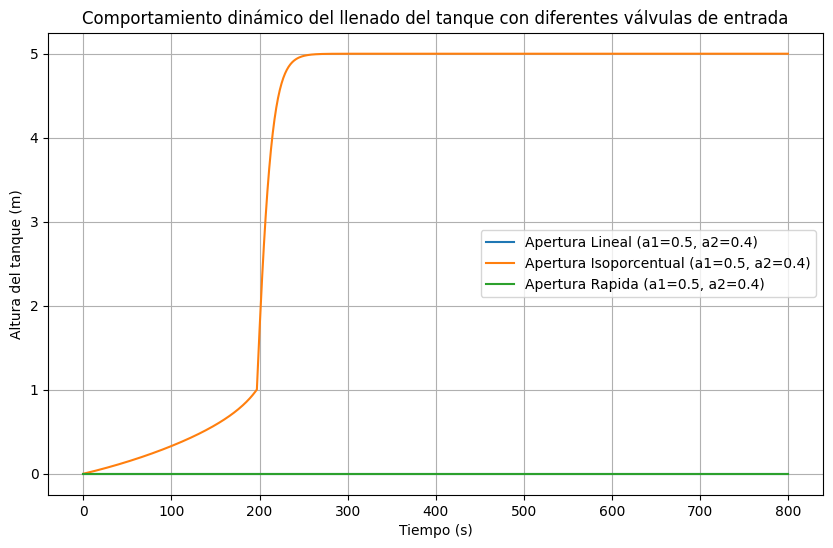

In [5]:
import numpy as np
import matplotlib.pyplot as plt


class TanqueEuler:
    def __init__(self, A, k1, k2, a1_func, a2_func, h0, h_step):
        
        self.A = A
        self.k1 = k1
        self.k2 = k2
        self.a1_func = a1_func
        self.a2_func = a2_func
        self.h0 = h0
        self.h_step = h_step

    def solve(self, total_time):
        """
        Resolver la ecuación diferencial usando el método de Euler.
        """
        num_pasos = int(total_time / self.h_step) 
        self.heights = [self.h0]
        self.times = [0]

        h = self.h0

        for _ in range(num_pasos):
            a1 = self.a1_func(h)
            a2 = self.a2_func(h)
            dh_dt = (self.k1 * a1 - self.k2 * a2 * h) / self.A
            h_next = h + self.h_step * dh_dt

            h = h_next
            self.heights.append(h)
            self.times.append(self.times[-1] + self.h_step)

    def plot_solution(self, label):
        """
        Grafica la solución obtenida con el método de Euler.
        """
        plt.plot(self.times, self.heights, label=label)


def Datos_Euler():
    # Pedir al usuario los datos necesarios
    A = float(input("Ingrese el área transversal del tanque (m^2): "))
    k1 = float(input("Ingrese la constante de la válvula de entrada (k_in): "))
    k2 = float(input("Ingrese la constante de la válvula de salida (k_out): "))
    h0 = float(input("Ingrese la altura inicial del tanque (m): "))
    h_step = float(input("Ingrese el tamaño del paso (Δt) para la simulación (s): "))
    total_time = float(input("Ingrese el tiempo total de simulación (s): "))
    a1_value = float(input("Ingrese la abertura de la válvula de entrada (0-1): "))
    a2_value = float(input("Ingrese la abertura de la válvula de salida (0-1): "))
    alpha = float(input("Ingrese el valor de alpha para la válvula isopercentual: "))

    # funciones de apertura de las válvulas
    
    def Apertura_lineal(x):
        return x

    def Apertura_isoporcentual(x, alpha): 
        if x <= 1:
            return alpha**(x - 1)
        else:
            return alpha**1

    def Apertura_rapida(x):
        return np.sqrt(x)

    # Crear solvers para cada tipo de válvula de entrada con la abertura dada
    solver_lineal = TanqueEuler(A, k1, k2, lambda x: a1_value * Apertura_lineal(x), lambda x: a2_value * Apertura_lineal(x), h0, h_step)
    solver_isoporcentual = TanqueEuler(A, k1, k2, lambda x: a1_value * Apertura_isoporcentual(x, alpha), lambda x: a2_value * Apertura_lineal(x), h0, h_step)
    solver_rapida = TanqueEuler(A, k1, k2, lambda x: a1_value * Apertura_rapida(x), lambda x: a2_value * Apertura_lineal(x), h0, h_step)

    # Resolver las ecuaciones diferenciales
    solver_lineal.solve(total_time)
    solver_isoporcentual.solve(total_time)
    solver_rapida.solve(total_time)

    # Graficar las soluciones
    plt.figure(figsize=(10, 6))
    solver_lineal.plot_solution(f"Apertura Lineal (a1={a1_value}, a2={a2_value})")
    solver_isoporcentual.plot_solution(f"Apertura Isoporcentual (a1={a1_value}, a2={a2_value})")
    solver_rapida.plot_solution(f"Apertura Rapida (a1={a1_value}, a2={a2_value})")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Altura del tanque (m)")
    plt.title("Comportamiento dinámico del llenado del tanque con diferentes válvulas de entrada")
    plt.legend()
    plt.grid(True)
    plt.show()


# Obtener datos del usuario y realizar la simulación
get_user_input()
